In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date

from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
def calc_ols(df1, s1, s2, smoothing):
    
    pair=df1.iloc[:, [s1, s2]]
    pair.dropna(how='any', axis=0, inplace=True)
    
    if smoothing=='yes':
        pair=pair.rolling(window=5).mean()
        pair.dropna(inplace=True)
        
    c=np.polyfit(pair.iloc[:, 0], pair.iloc[:, 1],  1, full=False)
    temp_list=pair.iloc[:, 1]-c[0]*pair.iloc[:, 0]
    
    return c[0], temp_list

In [5]:
def form_title(list1, s1, s2, c):
    
    col_title=list1[s1]+'_'+list1[s2]+'_'+str(round(c,2))
    
    return col_title

In [6]:
smoothing='yes'
if smoothing=='yes':
    scan_results=pd.read_csv('./data/results_smoothing.csv')
else:
    scan_results=pd.read_csv('./data/results.csv') # 1000+ pair

data_file=pd.read_csv('./data/selected.csv') #around 500
data_file['Date']=data_file['Date'].astype('datetime64[ns]')
data_file.set_index('Date', inplace=True)
data_file.index=pd.DatetimeIndex(data_file.index)
 
scan_results=scan_results.loc[scan_results.p_value<0.005]
scan_results.sort_values(by='p_value', inplace=True)
scan_results=scan_results.loc[scan_results.i_sect==scan_results.j_sect]
scan_results.info()

if smoothing=='yes':
    scan_results.to_csv('./data/same_sect_smoothing.csv', index=False) # 300+
else:
    scan_results.to_csv('./data/same_sect.csv', index=False) # 300+

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 8 to 2250
Data columns (total 11 columns):
t_stat     263 non-null float64
p_value    263 non-null float64
CI_1       263 non-null float64
CI_5       263 non-null float64
CI_10      263 non-null float64
i          263 non-null int64
j          263 non-null int64
i_sybl     263 non-null object
j_sybl     263 non-null object
i_sect     263 non-null object
j_sect     263 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 24.7+ KB


In [7]:
temp_list=[]
main_list=[]
title_list=[]

stock_list=data_file.columns.tolist()
ts_database=pd.DataFrame(index=data_file.index)

for num in range(0, len(scan_results.index)):

    i=scan_results.iloc[num, 5]
    j=scan_results.iloc[num, 6]   
    c, temp_list=calc_ols(data_file, i, j, smoothing)
    
    scan_results['i_sybl'].iloc[num]=stock_list[i]
    scan_results['j_sybl'].iloc[num]=stock_list[j]
    
    temp_df=pd.DataFrame(temp_list, index=data_file.index)
    ts_database=pd.concat([ts_database, temp_df], axis=1, join='outer')
    col_title=form_title(stock_list, i, j, c)
    title_list.append(col_title)

ts_database.columns=title_list

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\program files\python37\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
ts_database.head()

,MGM_ULTA_1.94,APD_BLL_0.31,HRL_MNST_1.6,ABT_RMD_1.83,DHR_IDXX_1.88,COST_MKC_0.56,ADBE_LRCX_0.73,ORLY_SBUX_0.19,PGR_SPGI_3.51,GD_MMM_0.99,...,COO_VAR_0.42,CMI_JBHT_0.66,MRO_RRC_2.32,JNJ_VAR_0.96,EQT_HP_1.24,CAG_KR_0.99,EFX_LMT_2.37,ACN_PAYX_0.33,BIIB_REGN_1.37,GS_MET_0.17
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,NaN,-0.357399,-1.801433,NaN,NaN,-1.446941,0.102531,NaN,1.409444,6.605869,...,-1.108729,0.538718,-4.496603,-2.447298,1.08688,-1.479618,-1.309275,NaN,NaN,NaN


In [9]:
ts_database.dropna(how='all', axis=0, inplace=True)

if smoothing=='yes':
    ts_database.to_csv('./data/ts_output_smoothing.csv')
else:
    ts_database.to_csv('./data/ts_output.csv')

In [10]:
ts=ts_database.iloc[:, 169]
#ts=ts['2000-10-31':]
ts.dropna(inplace=True)
ts.reset_index(drop=True, inplace=True)
#ts=ts+30
#ts=np.log(ts)


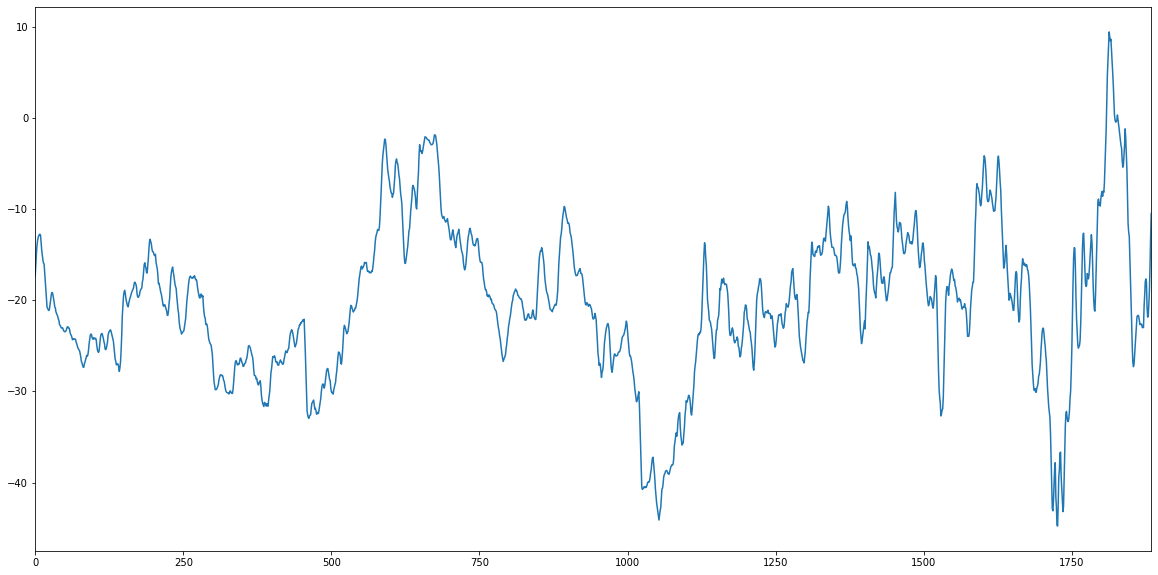

In [11]:
plt.figure(figsize=(20,10))
ts.plot()
plt.show()

In [12]:
adf_results=adfuller(ts)
print(adf_results)

(-4.169453011707789, 0.000741897278230932, 26, 1858, {'1%': -3.433874411978076, '5%': -2.8630968301361275, '10%': -2.567598800775398}, 1808.8280460482174)


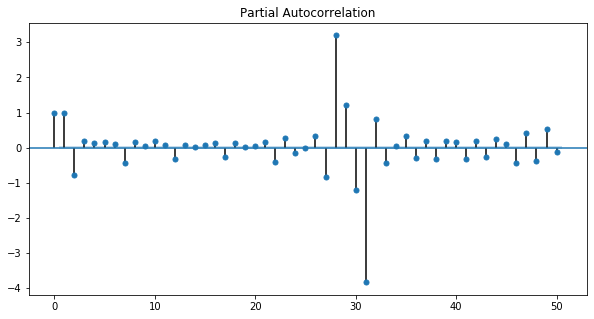

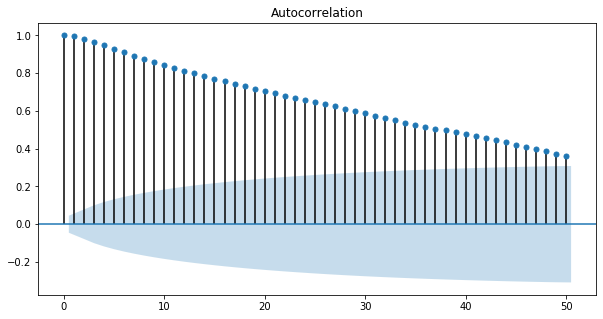

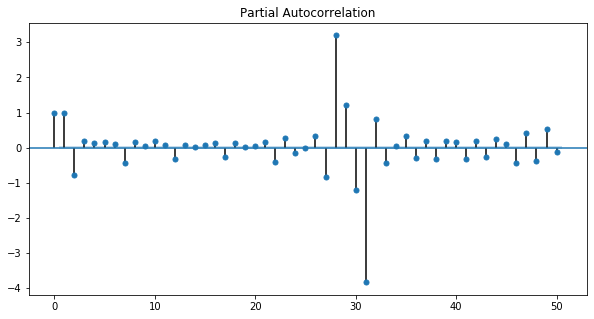

In [17]:
fig, ax=plt.subplots(figsize=(10, 5))
plot_acf(ts, lags=50, ax=ax)
fig, ax1=plt.subplots(figsize=(10, 5))
plot_pacf(ts, lags=50, ax=ax1)

In [ ]:
order_aic_bic=[]
for p in range(40):
    for q in range(40):
        try:
            model=SARIMAX(ts, order=(p, 0, q))
            results=model.fit()
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, np.nan, np.nan))
order_df=pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
order_df=order_df.dropna(axis=0)
print(order_df.sort_values('aic'))
print(order_df.sort_values('bic'))

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

                               SARIMAX Results                                
Dep. Variable:           COO_IQV_0.53   No. Observations:                 1885
Model:               SARIMAX(1, 0, 4)   Log Likelihood                -812.085
Date:                Thu, 19 Nov 2020   AIC                           1636.170
Time:                        23:00:17   BIC                           1669.420
Sample:                             0   HQIC                          1648.415
                               - 1885                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9967      0.002    547.893      0.000       0.993       1.000
ma.L1          1.0004      0.017     57.404      0.000       0.966       1.035
ma.L2          0.9986      0.017     58.481      0.0

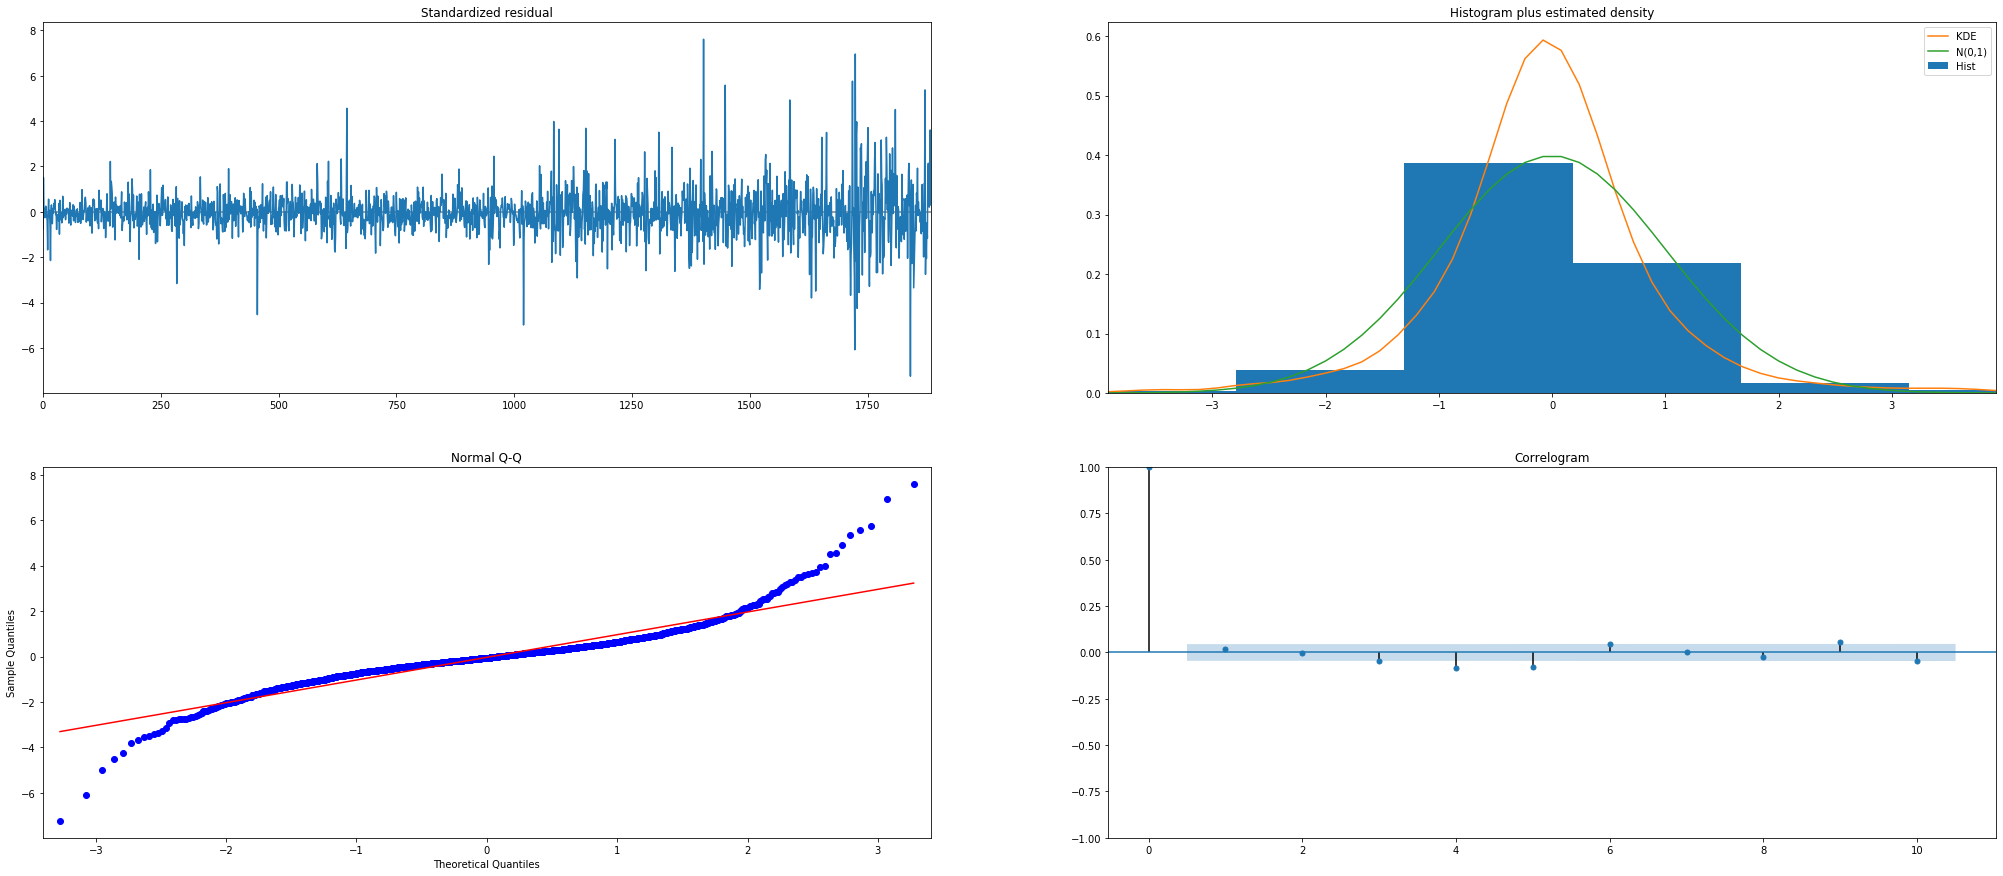

In [16]:
model=SARIMAX(ts, order=(1, 0, 4))
results=model.fit()
print(results.summary())
results.plot_diagnostics(figsize=(35,15))
plt.show()

      lower ICE_WLTW_1.66  upper ICE_WLTW_1.66
3665            32.487572            33.753231
3666            34.802079            36.067738
3667            36.127888            37.393547
3668            34.339842            35.605502
3669            35.963201            37.228861
...                   ...                  ...
3760            34.142998            35.408657
3761            30.710592            31.976251
3762            26.912809            28.178467
3763            23.166833            24.432492
3764            21.713970            22.979629

[100 rows x 2 columns]


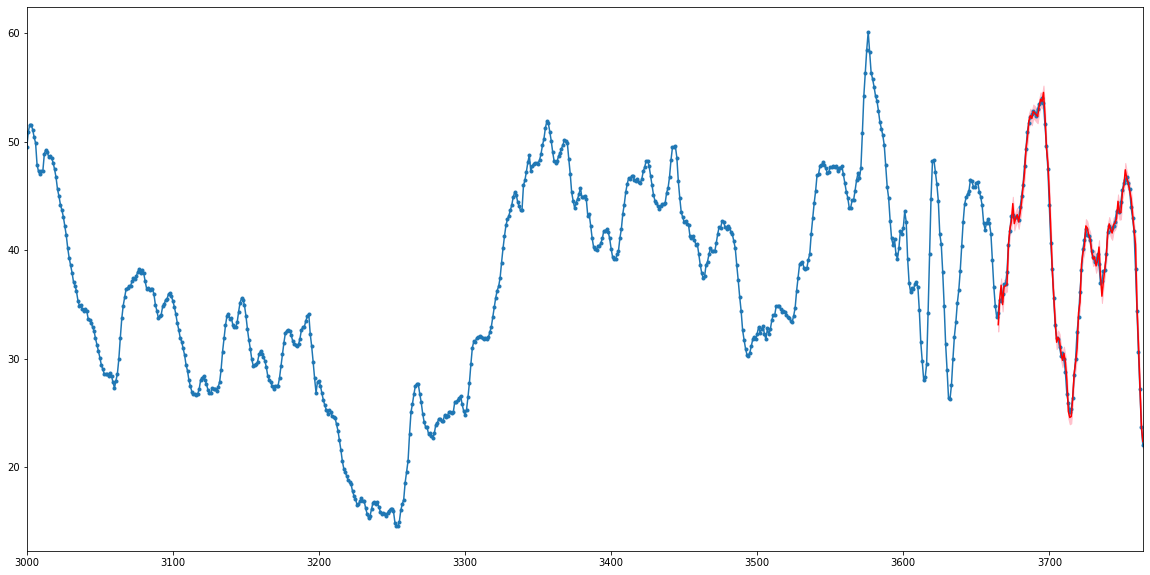

In [43]:
test_start=-100
forecast=results.get_prediction(start=test_start)
y_pred=forecast.predicted_mean
conf_int=forecast.conf_int()
print(conf_int)

plt.figure(figsize=(20,10))
ts[3000:].plot(marker='.')
plt.plot(y_pred.index, y_pred.values, color='red', label='forecast')
plt.fill_between(conf_int.index, conf_int['lower ICE_WLTW_1.66'], conf_int['upper ICE_WLTW_1.66'], color='pink')
plt.show()

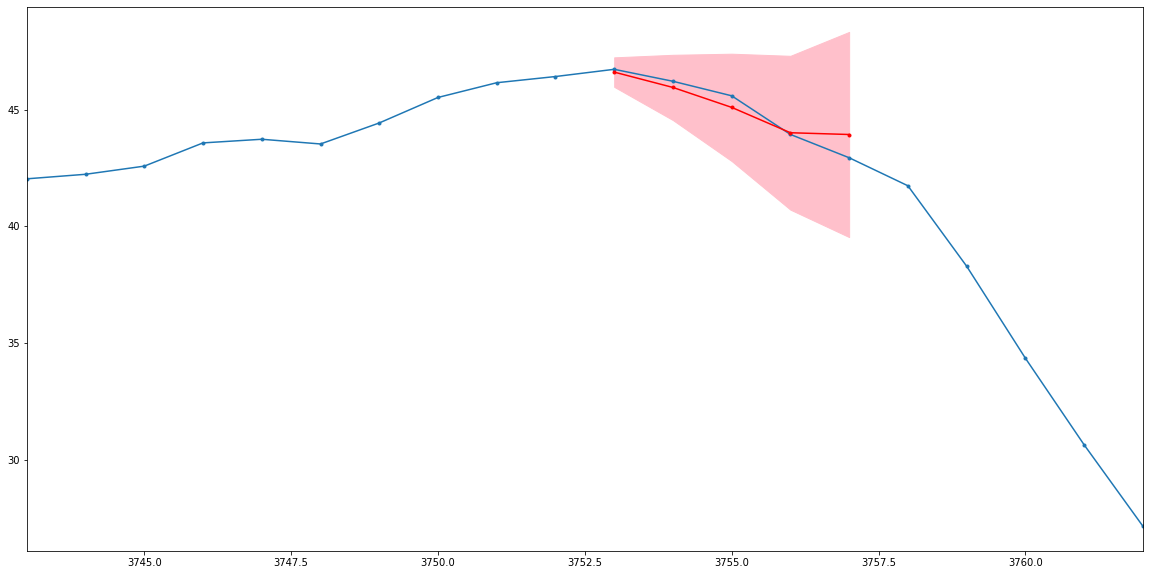

In [37]:
test_start=-20+8
back_forecast=results.get_prediction(start=test_start, end=test_start+4, dynamic=True)
mean_forecast=back_forecast.predicted_mean
conf_intervals=back_forecast.conf_int()

plt.figure(figsize=(20,10))
ts[test_start-10:test_start+10].plot(marker='.')
plt.plot(mean_forecast.index, mean_forecast.values, color='red', marker='.', label='forecast')
plt.fill_between(conf_intervals.index, conf_intervals['lower ICE_WLTW_1.66'], conf_intervals['upper ICE_WLTW_1.66'], color='pink')
plt.show()

In [36]:
print(mean_forecast.index)

RangeIndex(start=3753, stop=3758, step=1)


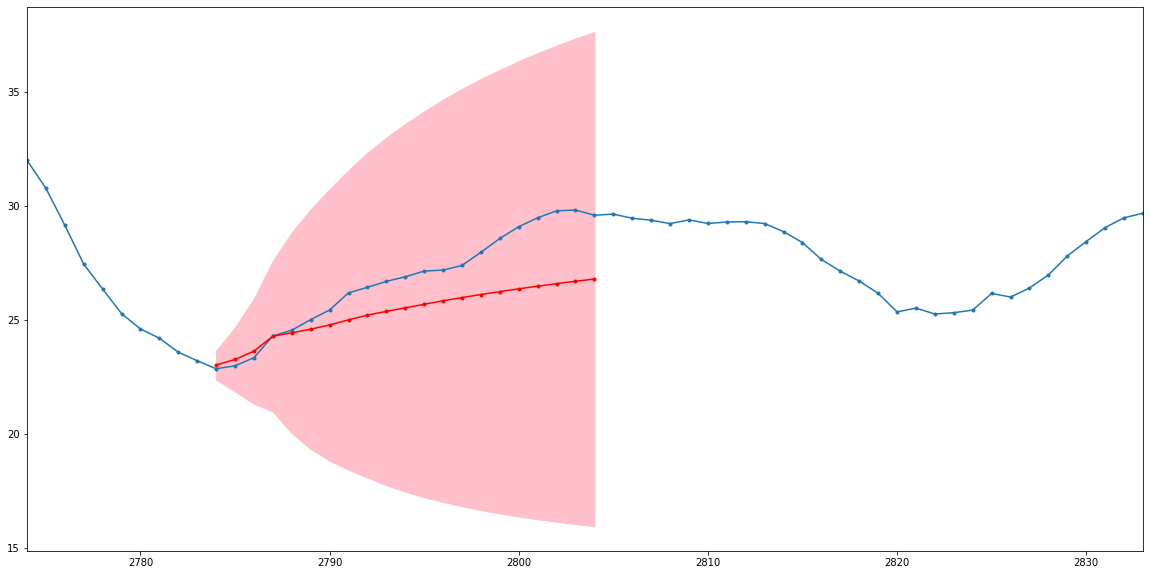

In [38]:
test_start=-1000+19
back_forecast=results.get_prediction(start=test_start, end=test_start+20, dynamic=True)
mean_forecast=back_forecast.predicted_mean
conf_intervals=back_forecast.conf_int()

plt.figure(figsize=(20,10))
ts[test_start-10:test_start+50].plot(marker='.')
plt.plot(mean_forecast.index, mean_forecast.values, color='red', marker='.', label='forecast')
plt.fill_between(conf_intervals.index, conf_intervals['lower ICE_WLTW_1.66'], conf_intervals['upper ICE_WLTW_1.66'], color='pink')
plt.show()

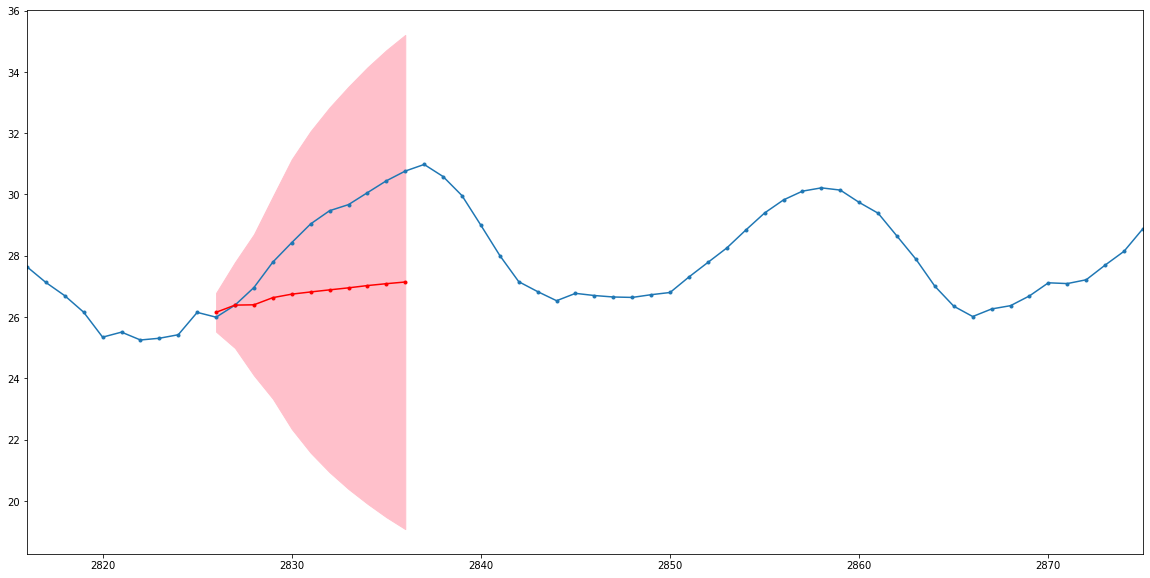

In [40]:
test_start=-1000+61
back_forecast=results.get_prediction(start=test_start, end=test_start+10, dynamic=True)
mean_forecast=back_forecast.predicted_mean
conf_intervals=back_forecast.conf_int()

plt.figure(figsize=(20,10))
ts[test_start-10:test_start+50].plot(marker='.')
plt.plot(mean_forecast.index, mean_forecast.values, color='red', marker='.', label='forecast')
plt.fill_between(conf_intervals.index, conf_intervals['lower ICE_WLTW_1.66'], conf_intervals['upper ICE_WLTW_1.66'], color='pink')
plt.show()